/Users/paullucaci/Desktop/P20
/Users/paullucaci/Desktop/P20/ExperimentalMethod


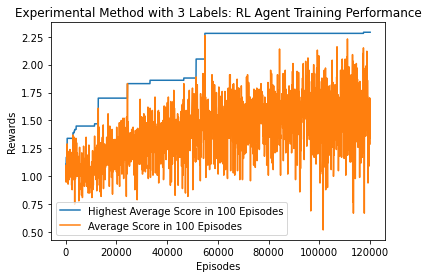

,episode,frame,highest_score,rolling_reward
119550,119550,86398042,2.29,1.64
119600,119600,86442708,2.29,1.54
119650,119650,86486880,2.29,1.70
119700,119700,86526281,2.29,1.38
119750,119750,86569774,2.29,1.34
119800,119800,86616889,2.29,1.70
119850,119850,86660940,2.29,1.70
119900,119900,86708213,2.29,1.70
119950,119950,86747993,2.29,1.47
120000,120000,86791847,2.29,1.29


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd

%cd /content/drive/MyDrive/P20/
from notebook_plotter import training_plots

%cd /content/drive/MyDrive/P20/ExperimentalMethod/
metrics_filename='./metrics/torch_3-probes-supervised_metrics_breakout.pkl'

training_plots(metrics_filename=metrics_filename, title="Experimental Method with 3 Labels: RL Agent Training Performance").tail(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/P20/ExperimentalMethod/
!git clone https://github.com/openai/baselines.git
!cd baselines; git checkout 9ee399f; pip install .

!pip install gym["atari"]
!python -m atari_py.import_roms "./Atari-Roms"

import sys, os

/content/drive/MyDrive/P20/AtariARI


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
115018/120000 done 	Episode Score: 4.0		Avg Score 100 Episodes: 1.980000	Highest Avg Score: 2.280000		Frame count: 82621626
115019/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.980000	Highest Avg Score: 2.280000		Frame count: 82622273
115020/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.950000	Highest Avg Score: 2.280000		Frame count: 82622893
115021/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.930000	Highest Avg Score: 2.280000		Frame count: 82623518
115022/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.900000	Highest Avg Score: 2.280000		Frame count: 82624154
115023/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.880000	Highest Avg Score: 2.280000		Frame count: 82624844
115024/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.880000	Highest Avg Score: 2.280000		Frame count: 82625463
115025/120000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 1.850000	Highest 

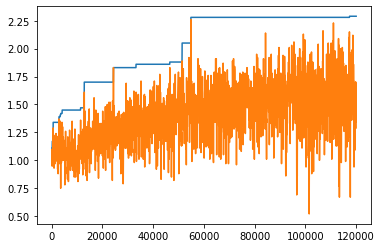

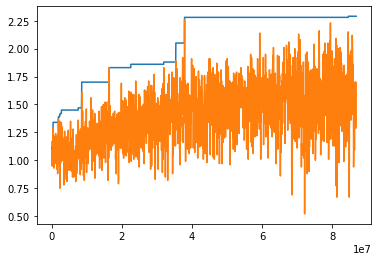

In [ ]:
import torch

%cd /content/drive/MyDrive/P20/ExperimentalMethod/

from p20 import training_p20, wrap_atariari, BaseEncoder
import gym

global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def main(game_name, seed):

    env = wrap_atariari(gym.make(game_name))
    env.seed(seed)

    p20_model = BaseEncoder().to(device)
    p20_model.load_state_dict(torch.load(open("./models/3-probes_breakout_supervised_encoder.pt", "rb")))
    p20_model.eval()

    training_p20(env=env, seed=seed, solved_at=40, p20_model=p20_model,
                    max_episodes=120000, lr=0.00025, gamma=0.99, max_epsilon=1, min_epsilon=0.1, render=False,
                    metrics_filename='./metrics/torch_3-probes-supervised_metrics_breakout.pkl',
                    checkpoint_filename='./checkpoints/torch_3-probes-supervised_checkpoint_breakout.pkl',
                    theta_filename='./theta/torch_3-probes-supervised_theta_breakout.npy')

if __name__ == "__main__":
    main(game_name="BreakoutNoFrameskip-v4", seed=42)

In [ ]:
while True: pass